Student Name: Luyu Feng;  Student ID: 22202363

## Task 2 Generating Summary Statistics

In [1]:
#!pip install gpxpy
import pandas as pd
import gpxpy
import gpxpy.gpx
from pandas import Series


### 1. Use the gpxpy library to load the GPX files  

In [2]:
def loadgpx(filename):
    path = filename+'.gpx'
    gpx_file = open(path, 'r')
    gpx = gpxpy.parse(gpx_file)
    return gpx

### 2.  Build a stage dataframe with summary statistics

In [3]:
# Load gpxfile to a summary statistics DataFrame

def GpxToDf(filename):
    gpx = loadgpx(filename)
    temp_list = []
    for n in range(len(gpx.tracks)):
        temp_list.append({
                'name': gpx.tracks[n].name,
                'uphill': gpx.tracks[n].get_uphill_downhill().uphill,
                'downhill': gpx.tracks[n].get_uphill_downhill().downhill,
                'maxelevation':gpx.tracks[n].get_elevation_extremes().maximum,
                'minelevation':gpx.tracks[n].get_elevation_extremes().minimum,
                'length_3d_km':gpx.tracks[n].length_3d()/1000
            })
    route_df = pd.DataFrame(temp_list)
    return route_df

In [4]:
# See how the DataFrame look like

GpxToDf('ev1').head()

name  uphill  downhill  maxelevation  \
0    001: Nordkapp – Honningsvag (Developed)  243.48    525.68         306.7   
1      002: Honningsvag – Repvag (Developed)  177.63    173.03         139.3   
2       003: Repvag – Olderfjord (Developed)  353.83    375.43         297.7   
3  004: Olderfjord – Jorehacopma (Developed)  432.93    144.83         290.3   
4        005: Jorehacopma – Alta (Developed)  198.44    463.44         380.2   

   minelevation  length_3d_km  
0           0.1     30.140299  
1           0.0     50.802539  
2           0.4     44.651227  
3           1.3     56.410819  
4           0.7     52.588302

### 3. Find the longest and hilliest stages

In [5]:
# Find the longest stage in a given route

def LongestStage(filename):
    LStage = pd.DataFrame()
    route_df = GpxToDf(filename)
    LStage = route_df.loc[route_df['length_3d_km'] == route_df['length_3d_km'].max()]
    LStage.index = Series('Longest Stage')
    return LStage

print('The longest stage in EuroVelo 6 is:')
LongestStage('ev6')
  

The longest stage in EuroVelo 6 is:


name  uphill  downhill  \
Longest Stage  37: Tuttlingen – Ulm (Developed with signs)  293.28    469.68   

               maxelevation  minelevation  length_3d_km  
Longest Stage         656.2         470.6    152.990887

In [6]:
# Find the most uphill stage in a given route

def UphillStage(filename):
    UStage = pd.DataFrame()
    route_df = GpxToDf(filename)
    UStage = route_df.loc[route_df['uphill'] == route_df['uphill'].max()]
    UStage.index = Series('Most Uphill Stage')
    return UStage

print('The hillest stage in EuroVelo 1 is:')
UphillStage('ev1')

The hillest stage in EuroVelo 1 is:


name  uphill  downhill  \
Most Uphill Stage  025: Kilboghavn – Nesna (Developed)  1026.1    1026.4   

                   maxelevation  minelevation  length_3d_km  
Most Uphill Stage         604.9           0.0     89.652503

### 4. Find a sequence of flat stages

In [7]:
# Find the three flattest contiguous stages in a given route

def Flattest3Stages(filename):   
    FStage = pd.DataFrame()
    route_df = GpxToDf(filename)
    
    elevation_diff_3 = []
    for n in range(0,len(route_df)-2):
        elevation_diff_3.append(
      route_df.loc[n,'maxelevation']-route_df.loc[n,'minelevation'] 
    + route_df.loc[n+1,'maxelevation']-route_df.loc[n+1,'minelevation']
    + route_df.loc[n+2,'maxelevation']-route_df.loc[n+2,'minelevation']        
    )
    num = elevation_diff_3.index(min(elevation_diff_3))

    FStage=route_df.loc[num:num+2,:]
    FStage.index = Series(['Flattest Contiguous Stages - 1','Flattest Contiguous Stages - 2','Flattest Contiguous Stages - 3'])
    return FStage

print('The three flattest contiguous stages in EuroVelo 2 is:')
Flattest3Stages('ev2')

The three flattest contiguous stages in EuroVelo 2 is:


name  \
Flattest Contiguous Stages - 1    23: Colchester – Harwich (Developed with signs)   
Flattest Contiguous Stages - 2  24: Hook of Holland – The Hague (Developed wit...   
Flattest Contiguous Stages - 3                25: The Hague – Utrecht (Developed)   

                                uphill  downhill  maxelevation  minelevation  \
Flattest Contiguous Stages - 1   48.81     58.11          35.1           0.0   
Flattest Contiguous Stages - 2   20.85     25.75          16.5          -0.4   
Flattest Contiguous Stages - 3   37.95     36.45           9.6          -6.4   

                                length_3d_km  
Flattest Contiguous Stages - 1     41.310168  
Flattest Contiguous Stages - 2     22.614237  
Flattest Contiguous Stages - 3     78.857777

In [8]:
# Find the five hilliest (most uphill) contiguous stages in a given route

def Hilliest5Stage(filename):
    HStage = pd.DataFrame()
    route_df = GpxToDf(filename)
    
    uphill_sum_5 = []
    for n in range(0,len(route_df)-4):
        uphill_sum_5.append(
        route_df.loc[n,'uphill']
        + route_df.loc[n+1,'uphill']
        + route_df.loc[n+2,'uphill']
        + route_df.loc[n+3,'uphill']
        + route_df.loc[n+4,'uphill']       
    )
    num = uphill_sum_5.index(max(uphill_sum_5))

    HStage=route_df.loc[num:num+4,:]
    HStage.index = Series(['Hilliest Contiguous Stages - 1','Hilliest Contiguous Stages - 2',
                           'Hilliest Contiguous Stages - 3','Hilliest Contiguous Stages - 4','Hilliest Contiguous Stages - 5'])
    
    return HStage

print('The five hilliest contiguous stages in EuroVelo 1 is:')
Hilliest5Stage('ev1')

The five hilliest contiguous stages in EuroVelo 1 is:


name  \
Hilliest Contiguous Stages - 1      095: Abbeyfeale – Camp (Developed with signs)   
Hilliest Contiguous Stages - 2       096: Camp – Annascaul (Developed with signs)   
Hilliest Contiguous Stages - 3  097: Annascaul – Glenbeigh (Developed with signs)   
Hilliest Contiguous Stages - 4  098: Glenbeigh – Waterville (Developed with si...   
Hilliest Contiguous Stages - 5   099: Waterville – Kenmare (Developed with signs)   

                                uphill  downhill  maxelevation  minelevation  \
Hilliest Contiguous Stages - 1  166.39    204.19         117.4           1.2   
Hilliest Contiguous Stages - 2  476.75    468.25         401.2           2.4   
Hilliest Contiguous Stages - 3  151.19    150.99         176.8           2.2   
Hilliest Contiguous Stages - 4  574.55    588.05         246.8           0.0   
Hilliest Contiguous Stages - 5  731.16    734.76         306.2          10.7   

                                length_3d_km  
Hilliest Contiguous Stages - 1     68.987337  
Hilliest Contiguous Stages - 2     51.749709  
Hilliest Contiguous Stages - 3     55.262337  
Hilliest Contiguous Stages - 4     72.419119  
Hilliest Contiguous Stages - 5     64.110925

## Task 3. Test the accuracy of the distance estimates

In [9]:
#!pip install googlemaps
#!pip install simplejson
#!pip install --upgrade google-auth-oauthlib

### 1. Use Google Map API to provide an estimate of the underestimate in length_3d distance   
As we know, length_3d method only calculates straight-line distances, so its distance is usually shorter than the actual distance.  
There I use the distance calculated by **Google Map API** as a reference, to estimate the distance underestimate in length_3d.

In [10]:
# Connect to Google Map API

import googlemaps 

API_key = '******' 
gmaps = googlemaps.Client(key=API_key)

In [11]:
# Find the route distance for a given gpx file

def googleDistance(filename):
    path = filename+'.gpx'
    gpx_file = open(path, 'r')
    gpx = gpxpy.parse(gpx_file)
    
    temp_list = []
    stageDistance = 0
    
    for n in range(len(gpx.tracks)):

        for m in range(len(gpx.tracks[n].segments[0].points)-1):
            origin = ((gpx.tracks[n].segments[0].points[m].latitude, gpx.tracks[n].segments[0].points[m].longitude))
            destination = ((gpx.tracks[n].segments[0].points[m+1].latitude, gpx.tracks[n].segments[0].points[m+1].longitude))
            pointDistance = gmaps.distance_matrix(origin, destination,mode='bicycling')["rows"][0]["elements"][0]["distance"]["value"]
            # necessary to set mode='bicycling' to make distance more accurate
            stageDistance = stageDistance + pointDistance
        stageDistance = stageDistance/1000
        temp_list.append({'name': gpx.tracks[n].name, 'Distance_km': stageDistance})
        
    Gdistance = pd.DataFrame(temp_list)
    return Gdistance


In [12]:
# Compare the route distance between Google Map API & length_3d

def compareDistance(filename):
    Gdistance = googleDistance(filename)
    Ldistance = GpxToDf(filename)
    Distance = pd.DataFrame(columns=['StageName','GoogleDistance','Length3dDistance','Difference'])
    Distance.StageName = Gdistance.name
    Distance.GoogleDistance = Gdistance.Distance_km
    Distance.Length3dDistance = Ldistance.length_3d_km
    Distance.Difference = Distance.GoogleDistance - Distance.Length3dDistance
    return Distance

In [13]:
# Use EuroVelo routes 14 and 19 as examples

ev19_diff = compareDistance('ev19')
ev14_diff = compareDistance('ev14')

In [14]:
ev19_diff.head(10)

StageName  GoogleDistance  \
0  01: Langres – Pouilly-en-bassigny (Developed w...       35.593000   
1  02: Pouilly-en-bassigny – Montigny-le-Roi (Dev...       10.624593   
2  03: Montigny-le-Roi – Bourmont (Developed with...       27.834625   
3  04: Bourmont – Neufchâteau (Developed with signs)       30.559835   
4  05: Neufchâteau – Vaucouleurs (Developed with ...       40.557560   
5  06: Vaucouleurs – Commercy (Developed with signs)       28.340558   
6    07: Commercy – St-Mihiel (Developed with signs)       30.227341   
7  08: St-Mihiel – Verdun memorial (Developed wit...       38.357227   
8  09: Verdun memorial – Dun-Sur-Meuse (Developed...       60.474357   
9  10: Dun-Sur-Meuse – Stenay (Developed with signs)       15.203474   

   Length3dDistance  Difference  
0         32.963064    2.629936  
1         10.209156    0.415437  
2         27.222500    0.612124  
3         29.234196    1.325638  
4         39.127542    1.430018  
5         27.420336    0.920222  
6         22.580279    7.647061  
7         38.047263    0.309965  
8         41.543988   18.930369  
9         14.850456    0.353018

In [15]:
ev14_diff.head(10)

StageName  GoogleDistance  \
0  1: Zell Am See – St Johann im Pongau (Develope...       44.072000   
1  2: St Johann im Pongau – Liezen (Developed wit...      121.605072   
2  3: Liezen – World Heritage Graz (Developed wit...      201.692605   
3  4: World Heritage Graz – Szentgotthard (Develo...      123.847693   
4   5: Szentgotthard – Vasvar (Developed with signs)       70.159848   
5       6: Vasvar – Keszthely (Developed with signs)       66.669160   
6  7: Keszthely – Balatonfuzfo (Developed with si...       96.050669   
7   8: Balatonfuzfo – Velence (Developed with signs)       71.511051   

   Length3dDistance  Difference  
0         40.425506    3.646494  
1        112.872059    8.733013  
2        162.597112   39.095493  
3        101.202530   22.645162  
4         68.121948    2.037899  
5         65.575842    1.093318  
6         91.289074    4.761595  
7         66.781224    4.729827

There in the DataFrame above, we can see, **GoogleDistance is always longer than Length3dDistance.**  
I use **(GoogleDistance - Length3dDistance)** as a an estimate of the underestimate distance in length_3d, which named **Difference** above.

### 2. Discuss this error estimation

#### (1) Discuss the merits of this error estimation
- Obviously, using length3d to calculate distance is much faster than googlemap；  
- Sometimes some coordinates of the gpx route are offset, which will cause the route generated by Google Maps to be completely weird, and calculate a very outrageous riding distance. At this time, the length3d distance is more reliable.   

#### (2) are all the discrepancies on the GPX side?
- Of course not.
- At most time, these underestimated distances are simply because length_3d only calculates straight line distances while Google Maps calculates actual distances.

In [16]:
# Observe the stage with the largest distance difference between Google Map API & Length_3d in ev19

ev19_diff = ev19_diff.sort_values(by='Difference', ascending=False)
ev19_diff.head(5)

StageName  GoogleDistance  \
35  36: Spijkenisse – Hook of Holland (Developed w...      126.341119   
18             19: Huy – Liège (Developed with signs)       68.285756   
33  34: Woudrichem – Dordrecht (Developed with signs)       70.098706   
8   09: Verdun memorial – Dun-Sur-Meuse (Developed...       60.474357   
11  12: Sedan – Charleville-Mézières (Developed wi...       43.833186   

    Length3dDistance  Difference  
35         45.844921   80.496198  
18         37.124946   31.160810  
33         45.102089   24.996618  
8          41.543988   18.930369  
11         28.385211   15.447975

In [17]:
# Find the points distance error in one stage

def stagedistance(filename, StageIndex):  
    gpx = loadgpx(filename)
    GStage = pd.DataFrame(columns = ['Gdistance'])
    for m in range(len(gpx.tracks[StageIndex].segments[0].points)-1):
        origin = ((gpx.tracks[StageIndex].segments[0].points[m].latitude, gpx.tracks[StageIndex].segments[0].points[m].longitude))
        destination = ((gpx.tracks[StageIndex].segments[0].points[m+1].latitude, gpx.tracks[StageIndex].segments[0].points[m+1].longitude))
        pointDistance = gmaps.distance_matrix(origin, destination,mode='bicycling')["rows"][0]["elements"][0]["distance"]["value"]
        GStage.loc[m,'Gdistance'] = pointDistance/1000
    
    LStage = pd.DataFrame(columns = ['Ldistance'])
    for n in range(len(gpx.tracks[StageIndex].segments[0].points)-1):
        origin = gpx.tracks[StageIndex].segments[0].points[n]
        destination = gpx.tracks[StageIndex].segments[0].points[n+1]
        pointDistance = origin.distance_3d(destination)
        LStage.loc[n,'Ldistance'] = pointDistance/1000

    Stage_diff = pd.DataFrame(columns = ['Gdistance','Ldistance','difference'])
    Stage_diff.Gdistance = GStage.Gdistance
    Stage_diff.Ldistance = LStage.Ldistance
    Stage_diff.difference = GStage.Gdistance - LStage.Ldistance
    
    return Stage_diff


In [18]:
# we can see that the stage 36 has the highest distance difference
# so we need to find which points cause this error

Stage_36 = stagedistance('ev19', 35) 
Stage_36 = Stage_36.sort_values(by='difference', ascending=False)
Stage_36.head(5)

Gdistance Ldistance difference
61    28.729  0.474616  28.254384
60    27.325  1.057645  26.267355
63     11.86  0.495943  11.364057
62     10.12  1.233712   8.886288
58     4.083  0.640775   3.442225

In [19]:
# Get the coordinates of the problem points

m=61
gpx = loadgpx('ev19')
print(gpx.tracks[35].segments[0].points[m].latitude, gpx.tracks[35].segments[0].points[m].longitude)
print(gpx.tracks[35].segments[0].points[m+1].latitude, gpx.tracks[35].segments[0].points[m+1].longitude)

51.972590251204 4.090193901211
51.972896106851 4.097096985206


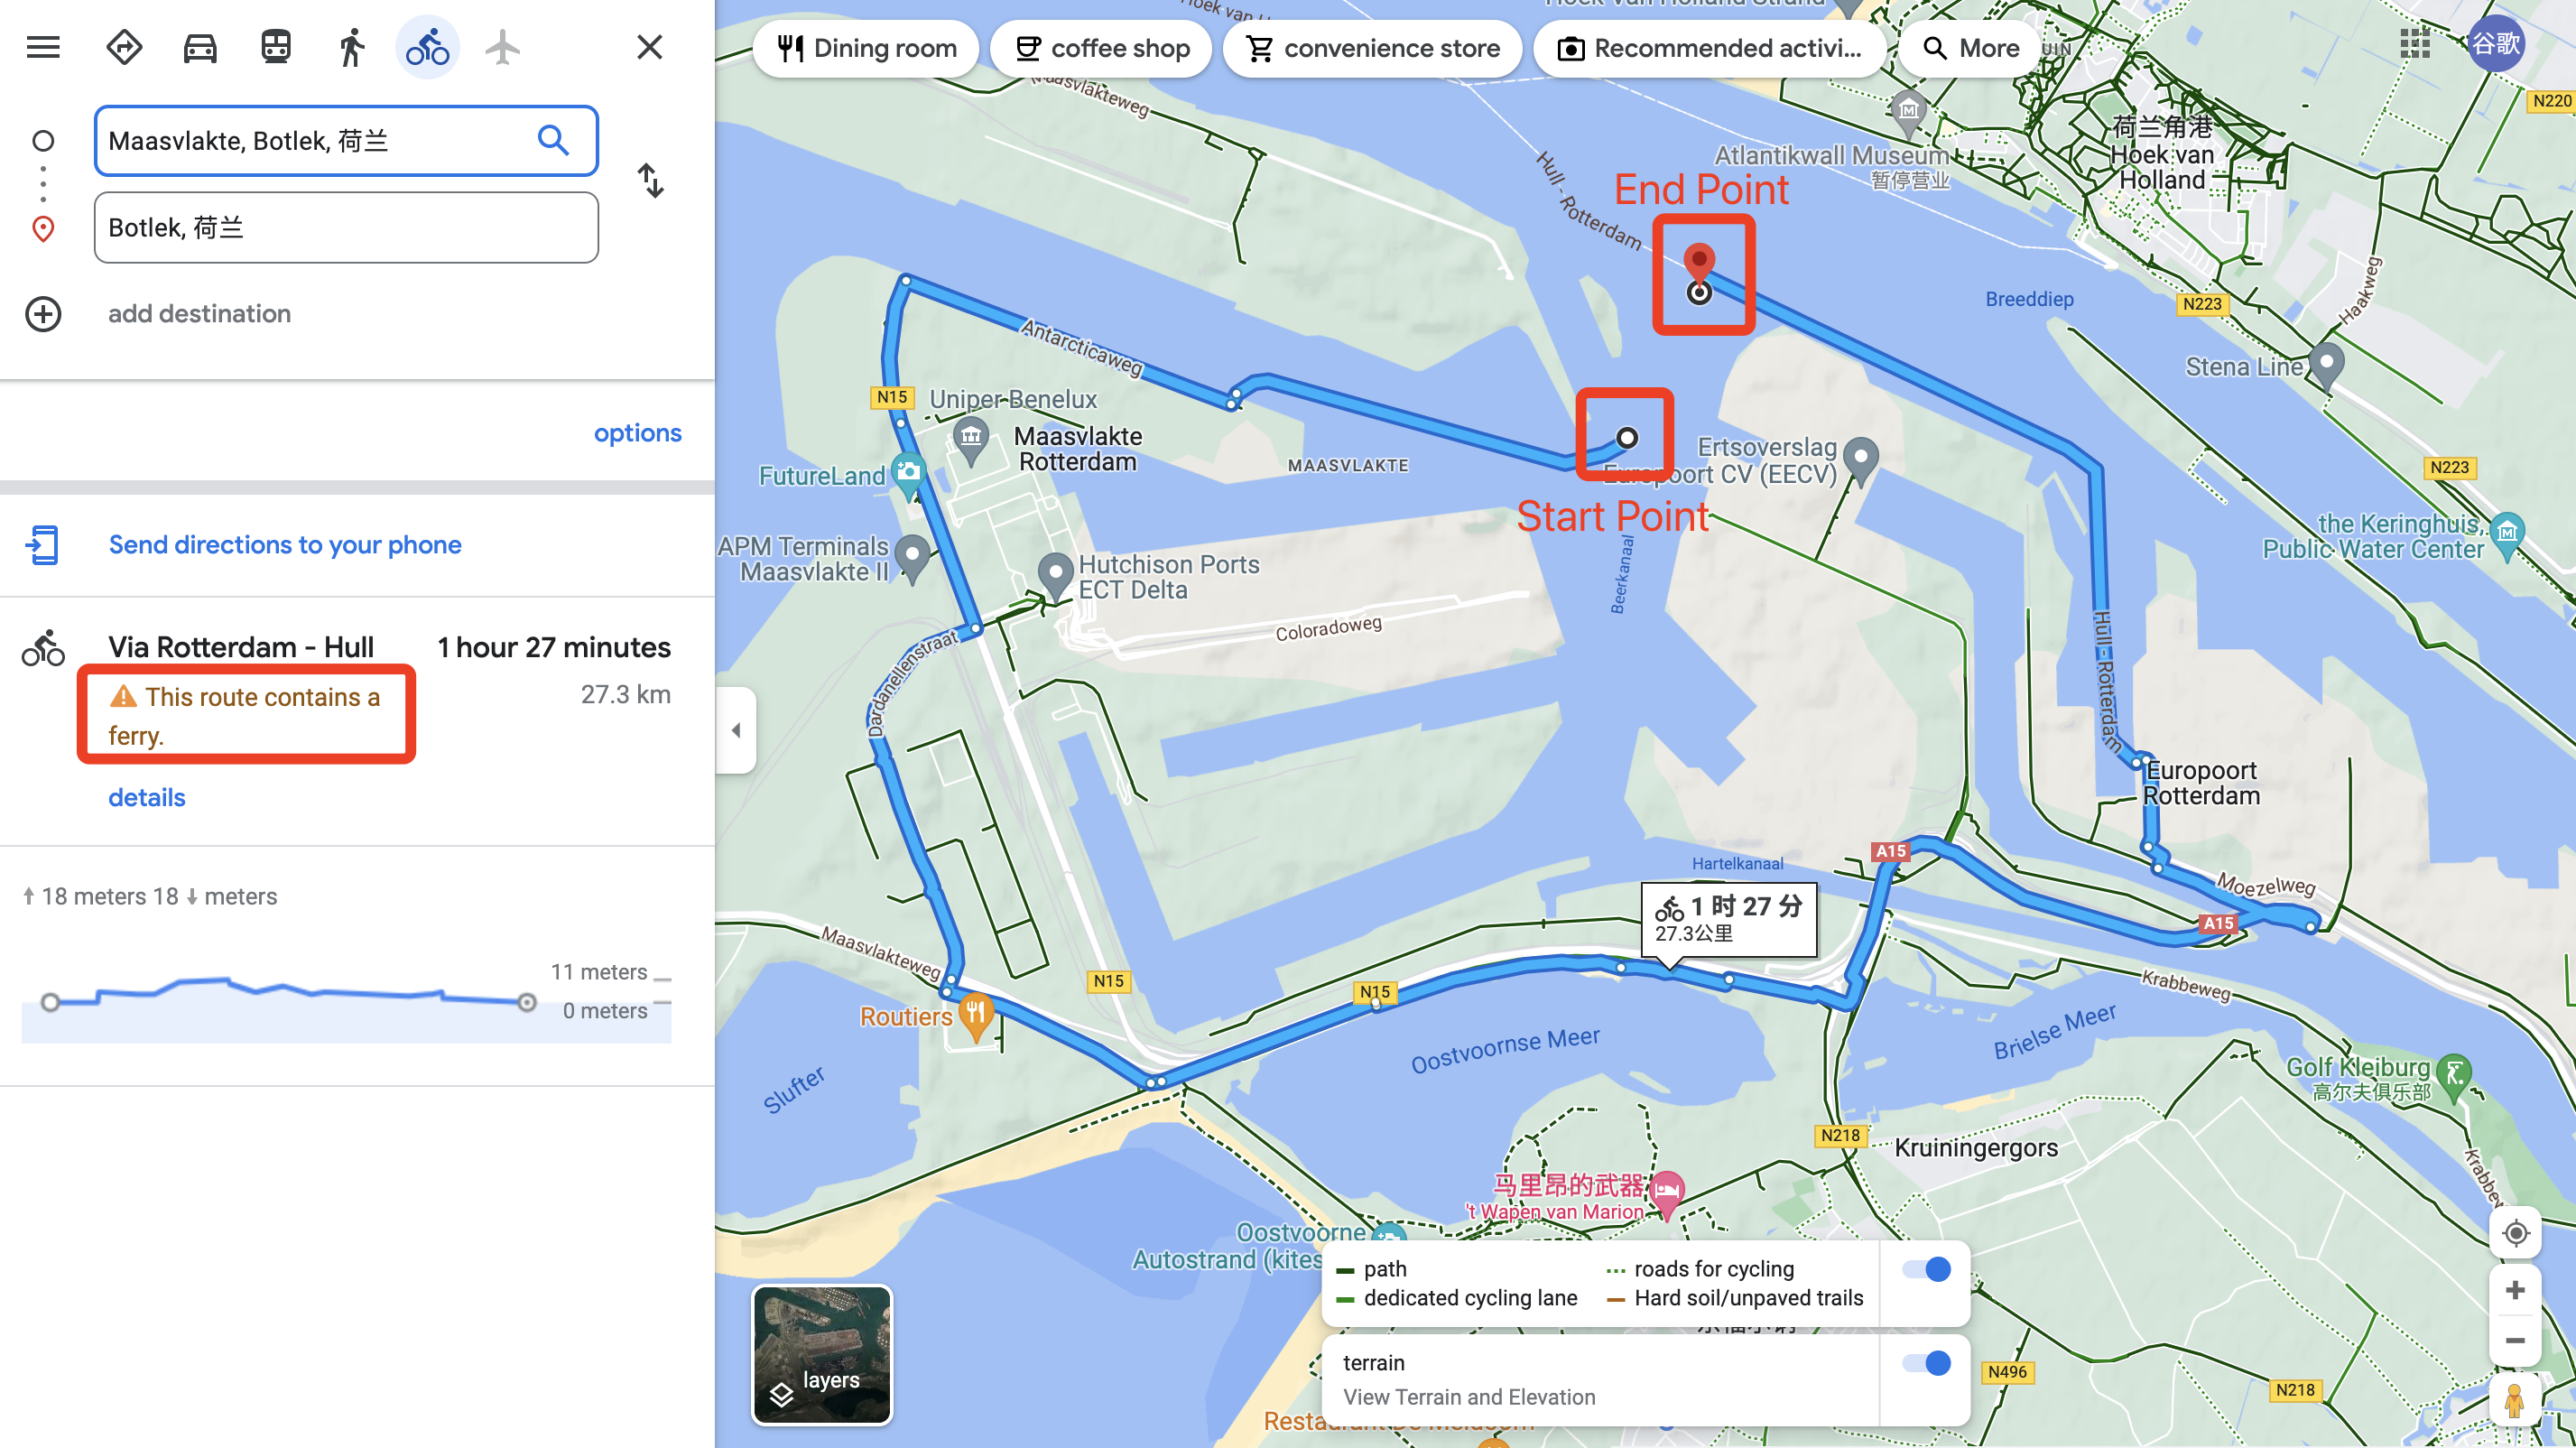

In [20]:
# search the coordinates in Google Map website

from IPython.display import Image
Image(filename='example1.png')

In the map above, we can see that **the two points are located in a river**. So when I selected for bike navigation, the map offered a way to get around from land rather than going straight between two points on the river.  
  
I speculate that this is due to the route **provider providing wrong coordinates** when making the gpx file, or the map provider **using other platform (not google maps) when generating coordinates** from places (generated coordinates sometimes vary between different map platforms ).  
  
**At this time, the length_3d distance might be more accurate than google distance.** Because the 2 points may locate in a island nearby, the distance between these two points is very close, and there is no need to make such a large circle when riding.

In [21]:
# repeat the same way to observe the error distance in ev14
ev14_diff = compareDistance('ev14')

In [22]:
ev14_diff = ev14_diff.sort_values(by='Difference', ascending=False)
ev14_diff.head()

StageName  GoogleDistance  \
2  3: Liezen – World Heritage Graz (Developed wit...      201.692605   
3  4: World Heritage Graz – Szentgotthard (Develo...      123.847693   
1  2: St Johann im Pongau – Liezen (Developed wit...      121.605072   
6  7: Keszthely – Balatonfuzfo (Developed with si...       96.050669   
7   8: Balatonfuzfo – Velence (Developed with signs)       71.511051   

   Length3dDistance  Difference  
2        162.597112   39.095493  
3        101.202530   22.645162  
1        112.872059    8.733013  
6         91.289074    4.761595  
7         66.781224    4.729827

In [23]:
# we can see that the stage 3 has the highest distance difference
# so we need to find which points cause this error

Stage_3 = stagedistance('ev14', 2) 
Stage_3 = Stage_3.sort_values(by='difference', ascending=False)
Stage_3.head(5)

Gdistance Ldistance difference
147    17.633  2.899825  14.733175
5       7.904  0.780613   7.123387
174     5.594  0.880525   4.713475
1       3.111  0.428001   2.682999
0       1.602  1.050546   0.551454

In [24]:
# Get the coordinates of the problem points

m=147
stage=2
gpx = loadgpx('ev14')
print(gpx.tracks[stage].segments[0].points[m].latitude, gpx.tracks[stage].segments[0].points[m].longitude)
print(gpx.tracks[stage].segments[0].points[m+1].latitude, gpx.tracks[stage].segments[0].points[m+1].longitude)

47.336400013134 15.356659982354
47.314310010226 15.377032030374


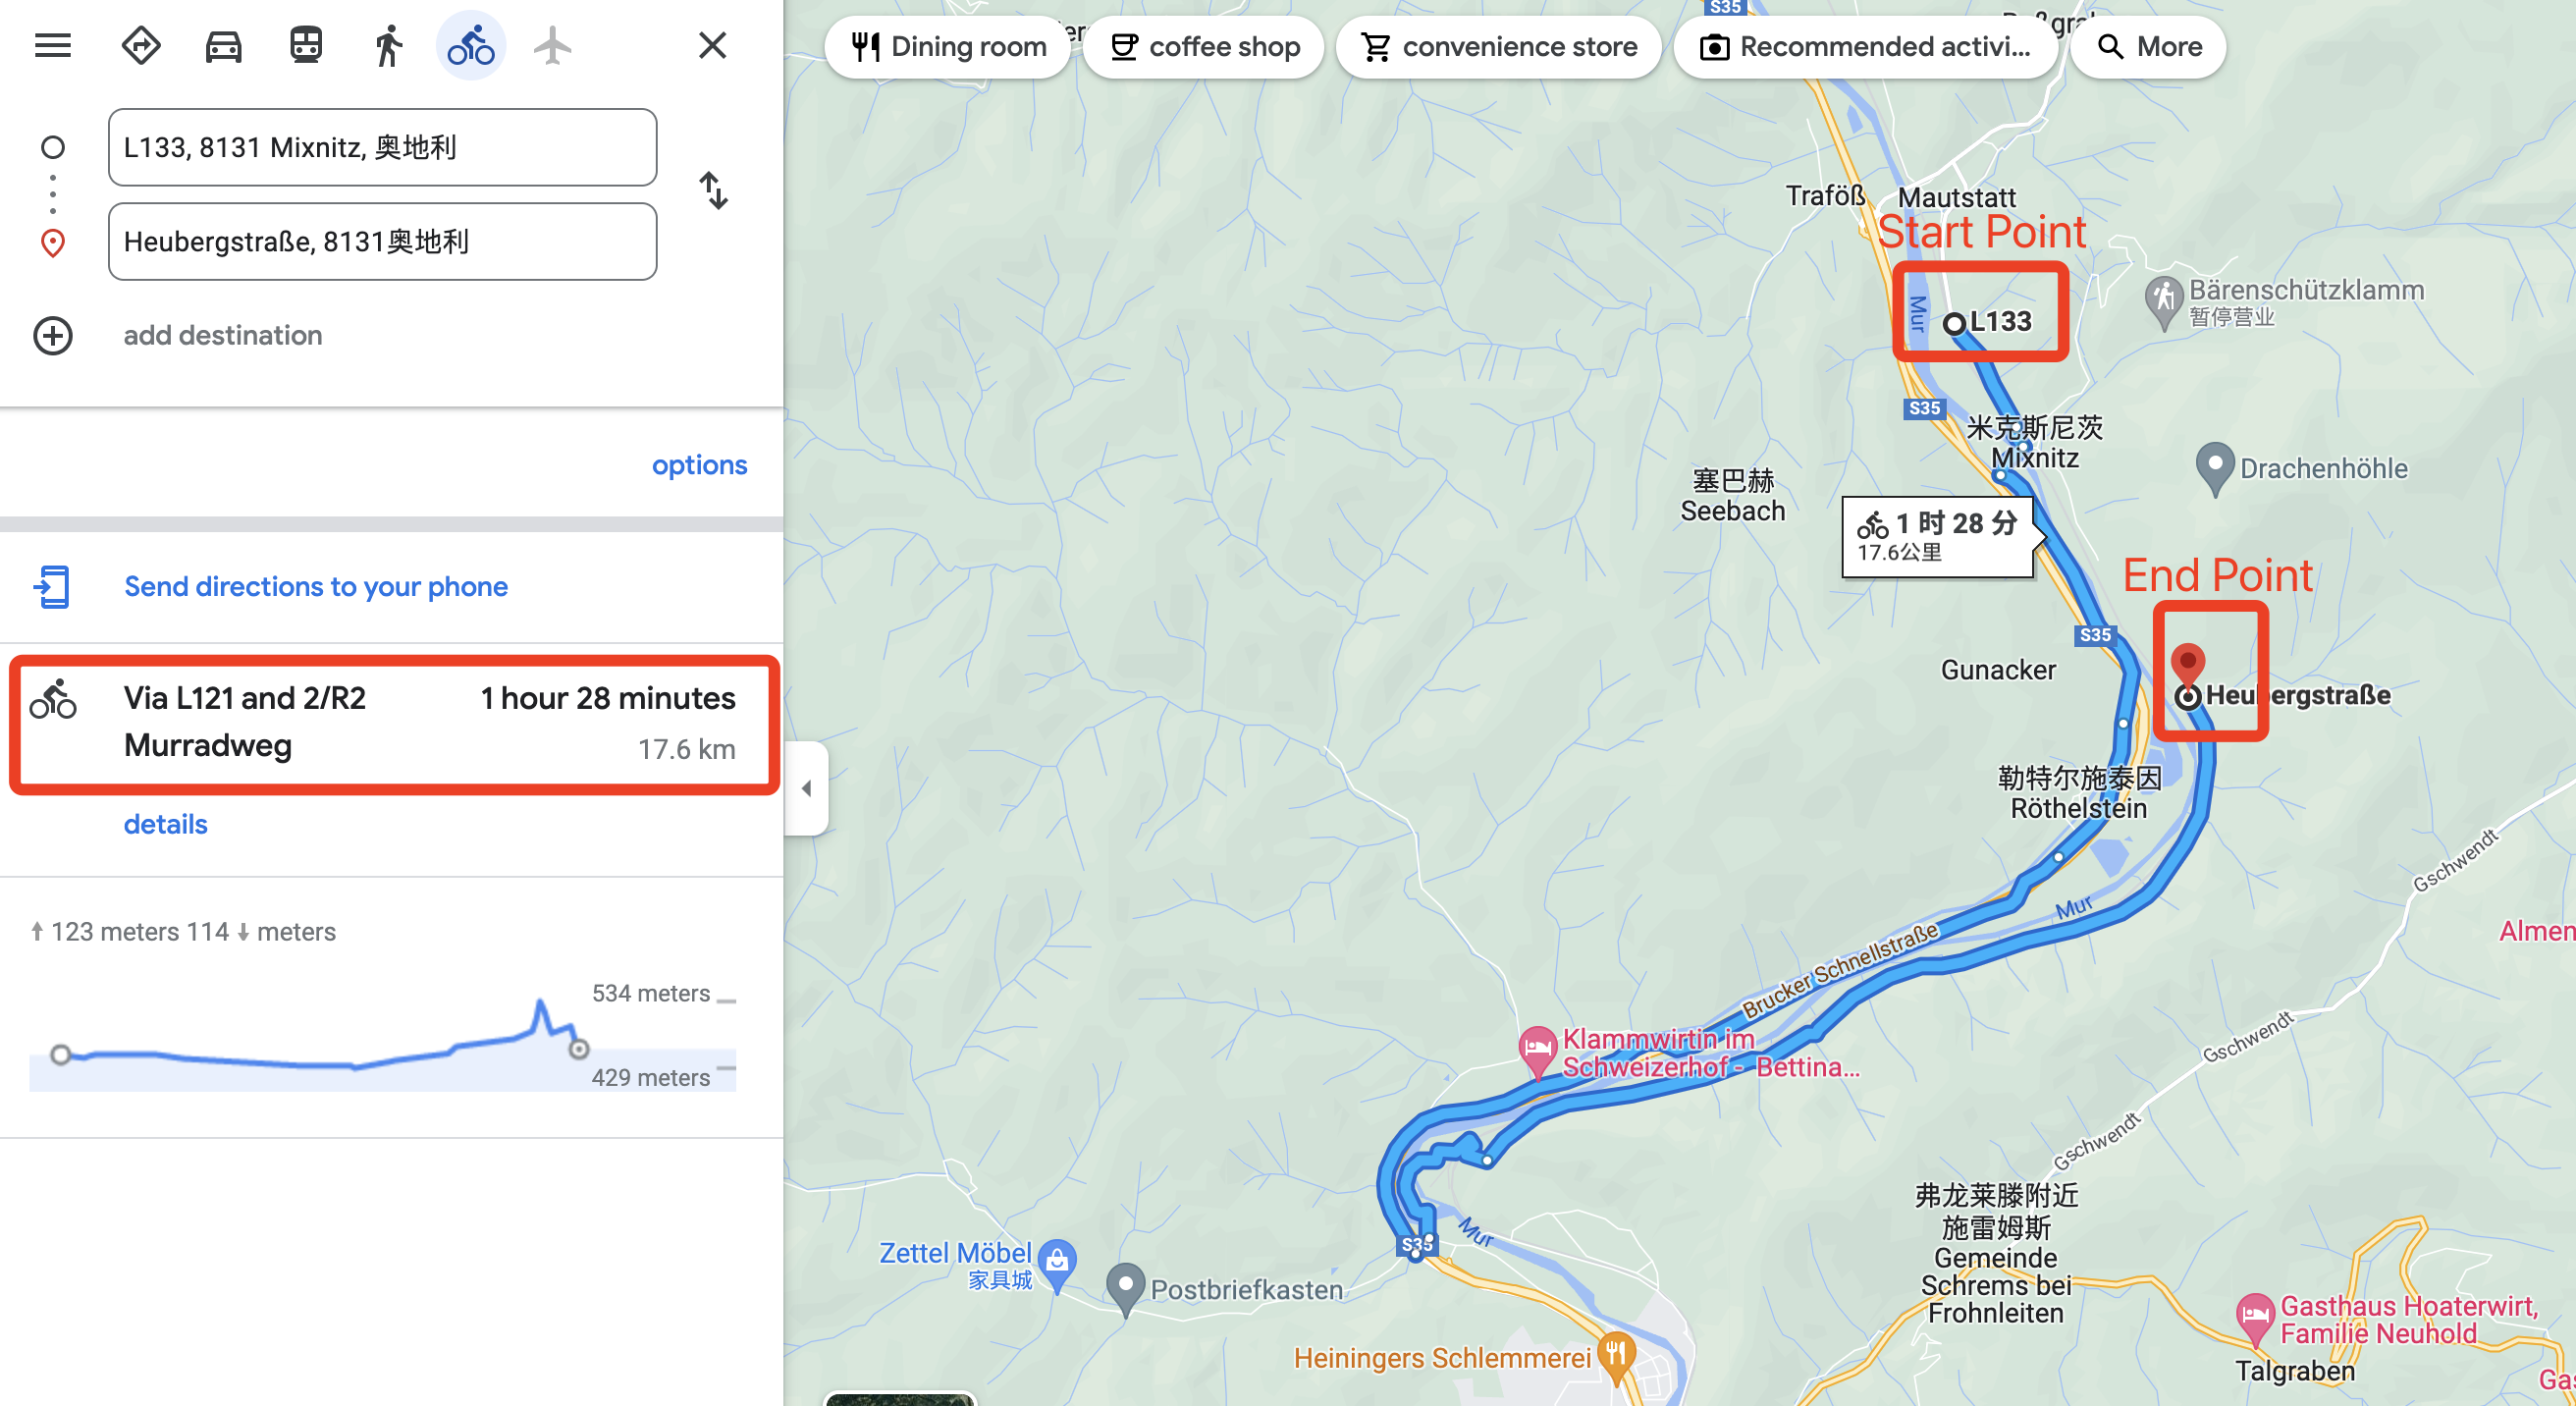

In [25]:
Image(filename='example2.png')

In the map above, we can see that the two points are in the mountainous terrain, and their straight-line distance is very close, but the riding distance requires a large circle.  
  
In our daily life, we can also experience that the distance between two points in a mountain may be very close, but we often have to go around other mountains or rivers to reach the next point.  
  
In this case, google distance performs better than length_3d, because the actual cycling distance is not just a straight-line distance.